In [7]:
from google.colab import files
uploaded = files.upload()
#importing a csv file .zip directly from kaggle boston housing prices

Saving archive.zip to archive.zip



Linear Regression Evaluation:
MAE:  3.92
RMSE: 6.33

Gradient Boosting Evaluation:
MAE:  2.92
RMSE: 4.88


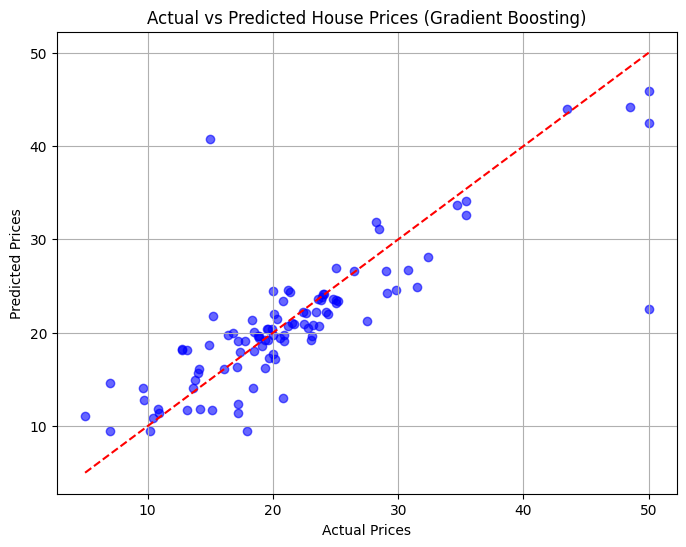

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Step 1: Select Features

features = ['RM', 'DIS', 'RAD', 'TAX', 'CHAS']  # Proxies for size, location, etc.
#Square Footage	- RM	-Avg. number of rooms (proxy for size)
#Bedrooms	(not directly in dataset)	assuming RM includes it.
#Location-	DIS, RAD, TAX or CHAS	-Distance, access to highway, river etc
target = 'MEDV'  # House Price

X = df[features]
y = df[target]


# Step 2: Preprocessing

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 3: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Training Models


# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

# Step 5: Evaluation

def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n{name} Evaluation:")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Gradient Boosting", y_test, gb_preds)


# Visualizing actual vs predicted (for Gradient Boosting)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_preds, color="blue", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Gradient Boosting)")
plt.grid(True)
plt.show()
